In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import fetch_openml
from torchfitter.trainer import Trainer

In [20]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

In [22]:
X.shape

(70000, 784)

In [30]:
import matplotlib.pyplot as plt

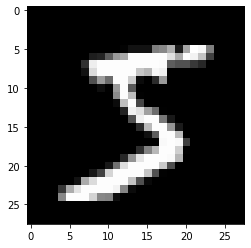

In [33]:
plt.imshow(X[0].reshape(28,28), cmap='gray')

In [37]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        
        self.model = nn.Sequential(
            nn.Linear(784, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, X):
        return self.model(X)


class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        
        self.model = nn.Sequential(
            nn.Linear(128, 1024),
            nn.ReLU(),
            nn.Linear(1024, 1024),
            nn.ReLU(),
            nn.Linear(1024, 784),
            nn.Tanh()
        )

    def forward(self, X):
        return self.model(X)

In [ ]:
class GAN(nn.Module):
    def __init__(self):
        super(GAN, self).__init__()
        
        self.generator = Generator()
        self.discriminator = Discriminator()
        
    def forward(self, X):
        self._train_D()
        self._train_G()
        
    def _train_D(self):
        """
        Train discriminator.
        """
        pass
    
    def _train_G(self):
        """
        Train generator.
        """
        pass

In [38]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
class CustomCriterion(nn.Module):
    """
    Define custom loss function for the GAN.
    """
    def __init__(self, disc_criterion, gen_criterion):
        self.D_criterion = disc_criterion
        self.G_criterion = gen_criterion
        
    def forward(
        self, fake_input, real_input, fake_target, real_target
    ):
        # loss
        pass
    
    def backward(self, *args, **kwargs):
        self.D_criterion.backward(*args, **kwargs)
        self.G_criterion.backward(*args, **kwargs)
    
    
class CustomOptimizer(optim.Optimizer):
    """
    Define a custom optimizer for the GAN.
    """
    def __init__(self, gen_optim, disc_optim):
        self.G_optim = gen_optim
        self.D_optim = disc_optim
        
    def __setstate__(self, state):
        super(CustomOptimizer, self).__setstate__(state)
        for group in self.param_groups:
            group.setdefault('amsgrad', False)
    
    @torch.no_grad()
    def step(self, closure=None):
        self.G_optim.step(closure=closure)
        self.D_optim.step(closure=closure)
        
    def zero_grad(self, *args, **kwargs):
        self.G_optim.zero_grad(*args, **kwargs)
        self.D_optim.zero_grad(*args, **kwargs)

In [35]:
trainer = Trainer(
    model=,
    criterion=,
    optimizer=,
    device=
)

torchfitter.trainer._trainer.Trainer